<h1><center>Foundation of Machine Learning</center></h1>
<h2>
<hr style=" border:none; height:3px;">
<center>Project : Spotify Recommender</center>
<hr style=" border:none; height:3px;">
</h2>

### Imports

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import sklearn 
from sklearn import model_selection
import Recommenders
import Evaluation

seed = 123

# Prepare the Dataset

In [2]:
# Read the data
df = pd.read_csv('final.csv', index_col=0)

#Merge song title and artist_name columns to make a merged column
df['song'] = df['title'].map(str) + " - " + df['artist_name']   
#Drop unneccesary columns
df.drop(['title', 'artist_name'], axis=1, inplace=True)

In [3]:
# Minimal number of songs a user must have listened to be kept in our dataset
min_songs = 10
# Minimal number of times a song must have been listened to be kept in our dataset
min_listenings = 10

In [4]:
# Count how many songs each user listened to
df['user_n_songs'] = df.groupby('user_id')['song'].transform('count')

# Count how many users listened to each song
df['song_n_users'] = df.groupby('song')['user_id'].transform('count')

# Keep all the users that listened to at least 10 songs
df = df[df['user_n_songs'] >= min_songs].drop_duplicates()

# Keep only the songs that were listened by at least 10 users
df = df[df['song_n_users'] >= min_listenings].drop_duplicates()

In [5]:
user_ids = df[['user_id']].drop_duplicates()
df_test = df[['song', 'user_id', 'play_count']].reset_index(drop=True)
df_test.head()

,song,user_id,play_count
0,Tu Quieres Volver - Gipsy Kings,ee7aa84c164038c963cfd02a7e52a5598aa470c3,2
1,Tu Quieres Volver - Gipsy Kings,1aa4fd215aadb160965110ed8a829745cde319eb,1
2,Tu Quieres Volver - Gipsy Kings,cca2694a19b2474bc731574ebb8b10382214f865,2
3,Tu Quieres Volver - Gipsy Kings,681064acdadcfeca36237d157f96a2be48b9ded0,4
4,Tu Quieres Volver - Gipsy Kings,2449f618b43cc1f407670dab3a7f129a127cda4a,1


# Recommenders

In this part, we will create, test and evaluate different model to give recommendations. The different recommender can be found in the file `Recommenders.py`, and the functions to evaluate the recommenders can be found in `Evaluation.py`.

In [8]:
evaluation = Evaluation.Evaluation(user_ids, df_test, seed)

## Simple Recommender based on Popularity

This simple model recommends songs to users based only on their popularity. This is a first naive approach as it is not a personalized recommendation: all users will get the same recommendations.

In [7]:
reco_pop = Recommenders.PopularityRecommender(df_test)

# Example with user ee7aa84c164038c963cfd02a7e52a5598aa470c3
reco_pop.recommend('ee7aa84c164038c963cfd02a7e52a5598aa470c3', 5, seed)[0]

,song,score,Rank
1212,Supermassive Black Hole (Album Version) - Muse,488,1.0
204,Check On It - Beyoncé feat. Slim Thug,466,2.0
334,Don't Panic - Coldplay,450,3.0
95,Baby Boy [feat. Beyonce] - Sean Paul,420,4.0
928,One I Love - Coldplay,386,5.0


### Evaluation of the model

Accuracy of the first suggestion :     22.60% (0.20007774425804925, 0.25192225574195076)
Accuracy of the 5 first suggestions :  21.08% (0.19949444387292414, 0.22210555612707583)
Accuracy of the 10 first suggestions : 18.13% (0.173748914491228, 0.18885108550877197)
Accuracy of the 20 first suggestions : 15.40% (0.14904693331112376, 0.15905306668887623)


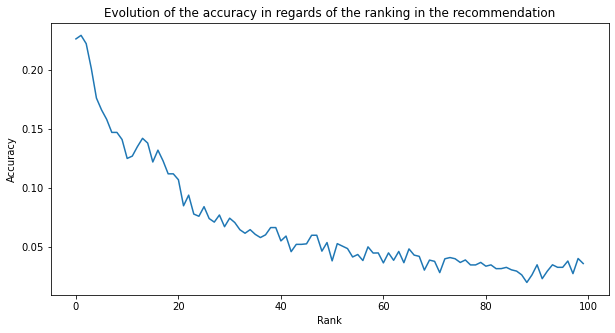

In [8]:
evaluation.evaluate(reco_pop.recommend, 1000)

## Recommender based on Item Similarity

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [6]:
reco_sim = Recommenders.ItemSimilarityRecommender(df_test)

# Example with user ee7aa84c164038c963cfd02a7e52a5598aa470c3
reco_sim.recommend('ee7aa84c164038c963cfd02a7e52a5598aa470c3', 5, seed)[0]

,user_id,song,score,rank
0,,Asesíname - Charly García,0.078531,1
1,,Marvel Hill - The Cardigans,0.076464,2
2,,Iron Man - The Cardigans,0.060365,3
3,,Rise & Shine - The Cardigans,0.055878,4
4,,Verano traidor - Vilma Palma e Vampiros,0.050510,5


### Evaluation of the model

Accuracy of the first suggestion :     62.00% (0.5248660051214322, 0.7151339948785678)
Accuracy of the 5 first suggestions :  39.28% (0.3499359859059975, 0.43563515637857164)
Accuracy of the 10 first suggestions : 29.64% (0.2679537235447309, 0.3247882119391401)
Accuracy of the 20 first suggestions : 20.91% (0.1906606508050715, 0.22747268252826186)


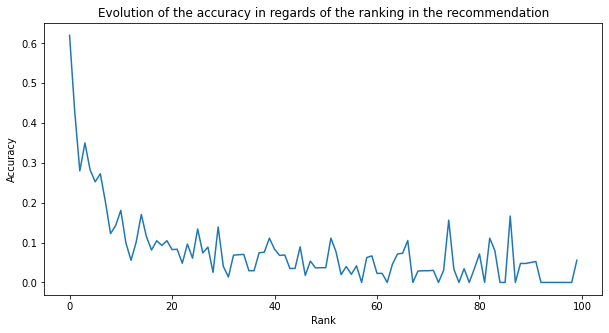

In [9]:
evaluation.evaluate(reco_sim.recommend, 100)

## Recommender based on Play Count

This model recommends songs to users based on TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO.

It is now important to create another model based on play_count and not only on rather the user has listened to the music or not. Let's try to call our system based on ratings.

In [13]:
reco_play = Recommenders.PlayCountRecommender(df_test)

# Example with user ee7aa84c164038c963cfd02a7e52a5598aa470c3
reco_sim.recommend('ee7aa84c164038c963cfd02a7e52a5598aa470c3', 5, seed)[0]

,song,score
0,Desde el este - Facto Delafe y las flores azules,13.072471
1,Down (LP Version) - Stone Temple Pilots,3.866814
2,Do You Want To - Franz Ferdinand,3.201539
3,Stop Breaking Down (1994 Digital Remaster) - The Rolling Stones,3.123605
4,Supermassive Black Hole (Album Version) - Muse,2.925513


### Evaluation of the model

Accuracy of the first suggestion :     0.00% (0.0, 0.0)
Accuracy of the 5 first suggestions :  0.00% (0.0, 0.0)
Accuracy of the 10 first suggestions : 0.00% (0.0, 0.0)
Accuracy of the 20 first suggestions : 0.00% (0.0, 0.0)


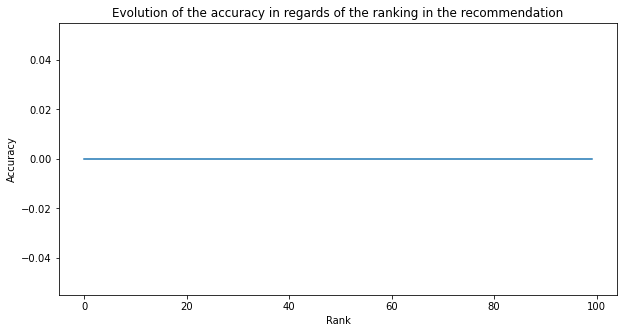

In [14]:
evaluation.evaluate(reco_play.recommend, 10)